
# Introduction to data analysis using pandas


Pandas is a popular open source Python package for data science, data engineering, analytics, and machine learning.

This notebook will give you a gentle introduction to pandas, but the exercises have been deisgned to allow you to complete them in multiple ways so feel free to google and find different functions. For more helpful documentation, check out these resources:

## Completely new to coding?

*   If you are new to google colab you can [watch an introduction to it here.](https://www.youtube.com/watch?v=inN8seMm7UI)
*   If you have never used python before [you can read an introduction to the language here](https://www.w3schools.com/python/python_intro.asp)

### New to pandas?

*   Introduction to Pandas in colab: https://colab.google/articles/pandas  
*   Pandas documentation introduction: https://pandas.pydata.org/docs/user_guide/10min.html







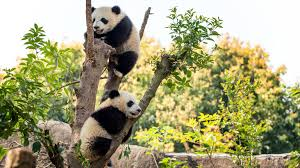


In [5]:
import pandas as pd

# Data we are using for analysis

This data is from the NSHBSA Open Data Portal, and is called the 'Prescription Cost analysis' dataset.

https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data

This data is open source, which means:

- We can share it openly
- It has no security concerns

This is a monthly dataset that describes how many medicines were prescribed across all GP Practices in england, per NHS Region, and what they cost.
This is 'real data', so actually describes real anti-depressant prescribing in England.
We have merged, simplified and filtered all these monthly files into a single dataset.

The data is being read into this notebook using this github repo link below (do not delete).



In [6]:
! git clone https://github.com/nhsengland/Digdata

Cloning into 'Digdata'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 40 (delta 21), reused 1 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 238.24 KiB | 6.62 MiB/s, done.
Resolving deltas: 100% (21/21), done.


### pca_regional_drug_summary_df

This dataset now contains 6 columns:


*   *YEAR*: The year in the format YYYY. There are 4 years-worth of prescribing information in the dataset.
*   *YEAR_MONTH*: The year and month, in the format YYYYMM, where 202401 is the same as January 2024. There are 46 year-month values in the data.
*   *REGION*: The NHS Region. There are 7 regions in the data.
*   *DRUG*: The name of the anti-depressant medicine. There are 32 of these in the data.
*   *ITEMS*: How many items were prescribed.
*   *COST*: The combined cost for all those items.

In a sentence we could describe this dataset as:

- Per English NHS Region and per year-month, the volume and cost of each antidepressant drug prescribed.

And what we are going to do with this data is:

- Understand national and regional prescribing volumes and costs
- Understand national and regional prescribing trends
- Understand monthly and annual trends
- And finally, maybe even predict future monthly anti-depressant prescribing volumes


In [7]:
pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_drug_summary_df)

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72
...,...,...,...,...,...,...
9450,2024,202410,MIDLANDS,Vortioxetine,5989,149309.82
9451,2024,202410,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779.09
9452,2024,202410,NORTH WEST,Vortioxetine,5430,124510.32
9453,2024,202410,SOUTH EAST,Vortioxetine,7018,178709.85


### pca_regional_summary_df

So we can see that the original data differs in a few ways:

- It only contains antidepressant drugs
- It doesn't contain BNF Chapter and BNF Section information

The BNF stands for the *British National Formulary*.
The BNF is structured hierarchically into Chapters, Sections and Chemical Substances (Drugs).

For example:

- Amitriptyline hydrochloride is an actual antidepressant *DRUG*
- Amitriptyline hydrochloride is one of many *DRUG* within the 'Antidepressant drugs' *BNF_SECTION*
- Antidepressant drugs is one of many *BNF_SECTION* within the '04: Central Nervous System' *BNF_CHAPTER*
- And there are 23 *BNF_CHAPTER* (although very little prescribing stems from some of the chapters)

In summary, BNF chapters are split into sections, which are then split into actual drugs (i.e. a hierarchy).

In [8]:
pca_regional_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_SUMMARY.csv')

display(pca_regional_summary_df)

,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70
...,...,...,...,...
317,202410,MIDLANDS,1515794,3650020.71
318,202410,NORTH EAST AND YORKSHIRE,1845998,3766629.55
319,202410,NORTH WEST,1196871,2687352.76
320,202410,SOUTH EAST,972188,2852364.46


# Part 1 Pandas introduction: Transforming and Aggregating Data

#### Printing data

There are a few methods you can use to view your dataframe, given the name df:


```python
# shows you the top 5 rows of a dataframe
df.head(5)

# this displays your dataframe
display(df)

# this displays the datatype of each column
df.info()

# this prints a list of columns in the df
df.columns
```

#### Selecting data

To view only one, or multiple columns in the dataframe, use the following syntax:

```python
#this will display a single column, 'prescription_count'
df['prescription_count']

#this will display both 'prescription_count' and 'gp_practice'. Remember to use double brackets to view multiple columns!
df[['prescription_count', 'gp_practice']]



#### Aggregating data

To read more:

*   [grouby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   [sort_values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)



```python
# this calculates the total number stored in 'prescription_count', so the total count of prescriptions
df['prescription_count'].sum()

# this calculates the total number of prescriptions, grouped by GP practice
df.groupby('gp_practice', as_index=False)['prescription_count'].sum()

# this sorts the values of the df by the values in column 'cost' from low to high
df.sort_values(by=['cost'])



#### Filtering data

To read more:


*   [Filtering to a column value](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)
*   [Using the query method](https://www.w3schools.com/python/pandas/ref_df_query.asp)



```python

# this filters to a specific value within a column, in this instance where the year is 2023
df[df['year']==2023]

# this filters to where drug counts are greater than 100
df[df['drug_count']>100]

# this also filters to where drug counts are greater than 100
df.query('drug_count > 100')


## Part 1: Transforming and Aggregating Data Exercises

### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

In [9]:
top10_drugs = (
    pca_regional_drug_summary_df
    .groupby("BNF_CHEMICAL_SUBSTANCE")["ITEMS"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

display(top10_drugs)

,ITEMS
BNF_CHEMICAL_SUBSTANCE,
Sertraline hydrochloride,85402251
Amitriptyline hydrochloride,59272937
Citalopram hydrobromide,52891620
Mirtazapine,46335570
Fluoxetine hydrochloride,28211759
Venlafaxine,21447209
Duloxetine hydrochloride,14262656
Escitalopram,6580386
Paroxetine hydrochloride,4886615


### Question 2: Calculate the monthly national cost of Mirtazapine prescribing

In [10]:
import pandas as pd
pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

mirtazapine_monthly_cost = (
    pca_regional_drug_summary_df[
        pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"] == "Mirtazapine"
    ]
    .groupby("YEAR_MONTH")["COST"]
    .sum()
)

display(mirtazapine_monthly_cost)

,COST
YEAR_MONTH,
202101,2380030.90
202102,2249220.63
202103,2523008.14
202104,2039348.02
202105,1935629.32
202106,2055820.88
202107,1609248.23
202108,1539582.17
202109,1621383.70


### Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [11]:
sertraline_midlands_annual = (
    pca_regional_drug_summary_df[
        (pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"] == "Sertraline hydrochloride") &
        (pca_regional_drug_summary_df["REGION_NAME"] == "MIDLANDS")
    ]
    .groupby("YEAR")["COST"]
    .sum()
)

display(sertraline_midlands_annual)


,COST
YEAR,
2021,17477276.46
2022,6433863.59
2023,7600322.04
2024,8094889.16


# Part 2: Data Visualisation

Visualising is an important tool in both analytics and data science.

Visualising data can help us better understand data and see trends in data, amongst other things.

There are several packages which you can explore through these links here:

*   A good start point for data visualisations in pandas can be found here-  https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
*   Introduction to the python package matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/
*   Introduction to the python package seaborn - https://www.geeksforgeeks.org/introduction-to-seaborn-python/





## Part 2: Data Visualisation Exercises

### Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

In [12]:
import matplotlib.pyplot as plt

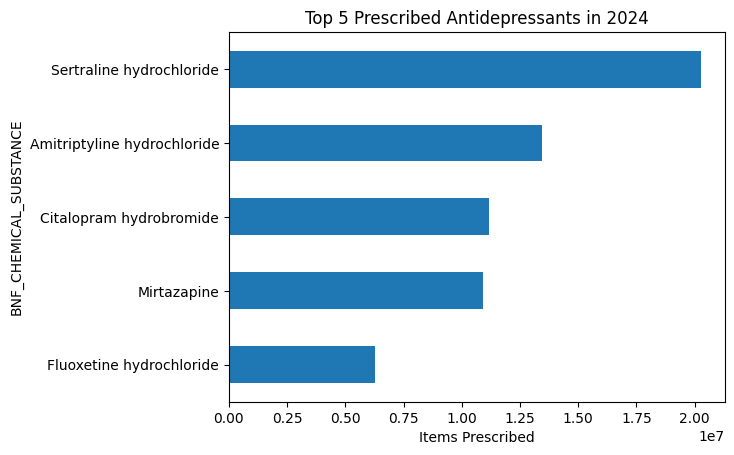

In [13]:
top5_2024 = (
    pca_regional_drug_summary_df[
        pca_regional_drug_summary_df["YEAR"] == 2024
    ]
    .groupby("BNF_CHEMICAL_SUBSTANCE")["ITEMS"]
    .sum()
    .sort_values(ascending=True)
    .tail(5)
)

top5_2024.plot(kind="barh")
plt.title("Top 5 Prescribed Antidepressants in 2024")
plt.xlabel("Items Prescribed")
plt.show()


### Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.


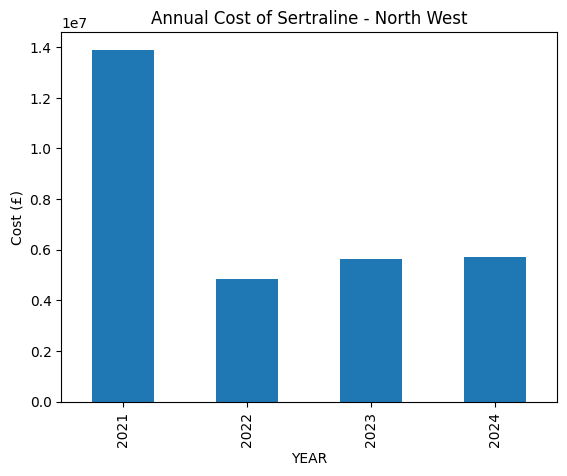

In [14]:
sertraline_nw = (
    pca_regional_drug_summary_df[
        (pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"] == "Sertraline hydrochloride") &
        (pca_regional_drug_summary_df["REGION_NAME"] == "NORTH WEST")
    ]
    .groupby("YEAR")["COST"]
    .sum()
)

sertraline_nw.plot(kind="bar")
plt.title("Annual Cost of Sertraline - North West")
plt.ylabel("Cost (£)")
plt.show()








### Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.

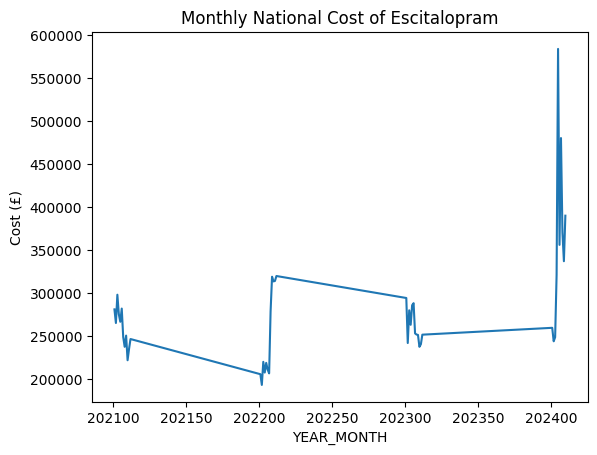

In [15]:
escitalopram_monthly = (
    pca_regional_drug_summary_df[
        pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"] == "Escitalopram"
    ]
    .groupby("YEAR_MONTH")["COST"]
    .sum()
    .round(0)
)

escitalopram_monthly.plot(kind="line")
plt.title("Monthly National Cost of Escitalopram")
plt.ylabel("Cost (£)")
plt.show()


# Part 3: Data Metrics and Insights


#### Advanced analysis introduction


*   [Introduction to statistics in pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
*   [Pivot tables](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



```python
# this gives a summary of some descriptive statistics for the dataframe
df.describe()

# this will return the average number in the drug count field
df['drug_count'].mean()

# this will return the minimum value, the lowest observed value
df['drug_count'].min()

# this will return the maximum value, the highest observed value
df['drug_count'].max()

# this will pivot the df so each row represents a year, the columns are now the regions and the values are the summed count of the items within the column 'drug_count'
df.pivot_table(index='year', columns='region', values='drug_count', aggfunc=sum)  



## Part 3: Data Metrics and Insight Exercises

For these exercises, you will need to use the dataframe pca_regional_drug_summary_df




### Question 1: For context, create a monthly line chart showing total national prescribing cost

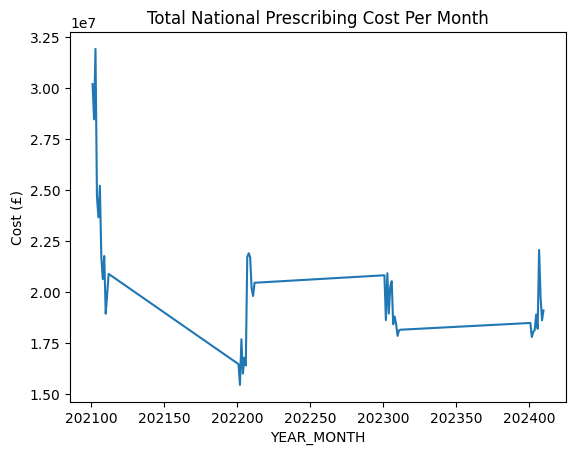

In [16]:
monthly_total_cost = (
    pca_regional_drug_summary_df
    .groupby("YEAR_MONTH")["COST"]
    .sum()
)

monthly_total_cost.plot(kind="line")
plt.title("Total National Prescribing Cost Per Month")
plt.ylabel("Cost (£)")
plt.show()


### Question 2: Create *annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)


In [17]:
monthly_totals = (
    pca_regional_drug_summary_df
    .groupby("YEAR_MONTH")["COST"]
    .sum()
    .reset_index()
)

monthly_totals["YEAR"] = monthly_totals["YEAR_MONTH"].astype(str).str[:4]

annual_stats = monthly_totals.groupby("YEAR")["COST"].describe()[["min","25%","50%","75%","max"]]

display(annual_stats)


,min,25%,50%,75%,max
YEAR,,,,,
2021,18949756.25,2.083549e+07,2.272424e+07,2.603658e+07,31933609.64
2022,15453991.47,1.645837e+07,1.875420e+07,2.077687e+07,21914896.72
2023,17859075.18,1.836279e+07,1.872291e+07,2.034416e+07,20934041.83
2024,17802904.89,1.816383e+07,1.856003e+07,1.905628e+07,22071625.09



### Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

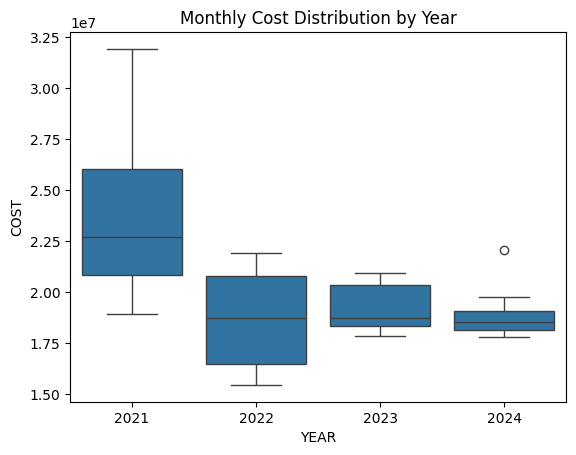

In [18]:
import seaborn as sns

sns.boxplot(x="YEAR", y="COST", data=monthly_totals)
plt.title("Monthly Cost Distribution by Year")
plt.show()


### Question 4: Calculate the annual *mean* monthly total national prescribing cost and display in a vertical barchart

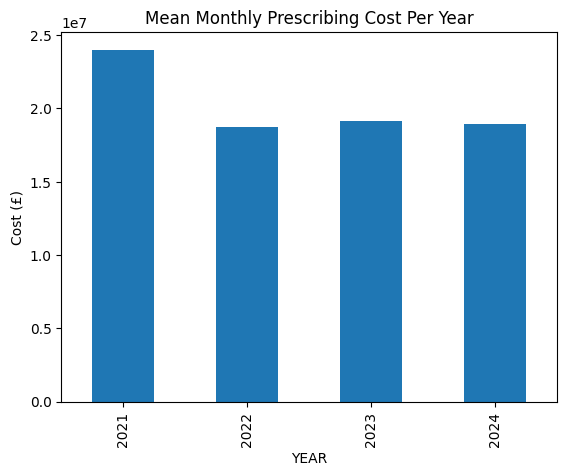

In [19]:
annual_mean_cost = monthly_totals.groupby("YEAR")["COST"].mean()

annual_mean_cost.plot(kind="bar")
plt.title("Mean Monthly Prescribing Cost Per Year")
plt.ylabel("Cost (£)")
plt.show()


### Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
#### Note: Each row should be a year and each column should be a region.

In [20]:
drug_year_region = pca_regional_drug_summary_df.copy()

pivot_table = pd.pivot_table(
    drug_year_region,
    values="COST",
    index="YEAR",
    columns="REGION_NAME",
    aggfunc="sum"
)

display(pivot_table)


REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,32549420.30,31640433.44,54008266.51,54219524.21,41951035.20,44230470.23,29500099.95
2022,25646510.64,25262950.79,42218785.19,41628529.09,31645816.96,35263810.74,22982042.81
2023,26095459.16,26264853.62,43734608.81,43117423.36,32223271.81,35320634.97,23257408.13
2024,21556935.59,21338156.62,36140498.75,36540048.99,26356567.72,28686310.67,18570411.15


# Report Task

You are a Public Health Analyst and you have been asked to write a report.
This report will describe and analyse antidepressant prescribing, looking at volume and cost, both nationally and regionally.
The title of this report is 'Longitudinal Analysis of Antidepressant Prescribing'.
Longitudinal just means the analysis is over an extended period of time, which we have with 4 years of monthly data.
The report is to be split into two sections:

Part One: To set the context for the report, this will be overall national and regional figures

Part Two: The will be followed-up by a more exploratory analysis that delves into antidepressant prescribing cost trends.

Part Two Extension: Those attempting the extension task can then look at creating standardised metrics to understand more specific prescribing patterns.






## Part One

Part One is a directed analysis and the same content needs to be covered by both streams.
These required content for Part One is:

1.  Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

2.  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

3.  By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

Try and make text between sections flow, so the report reads well.
The findings from part one may inform how you approach part two.

## Part Two (Longitudinal Analysis)

Now you have a good understanding around national and regional antidepressant prescribing volume and cost trends.
You will be given various topics or points to explore, and you will decide what approach or charts best does this.
To supplement the initial analysis, you will now:

-   Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing
-   Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
-   Then give a high-level summary to your work and findings.


## Part Two Extension (Antidepressant Case studies)

The extension is only to be attempted if you completed the data_metrics_and_insights learning material and exercises.
The analyses within this section will delve a bit deeper into antidepressant prescribing costs.

-   Focus one one or more antidepressants that play a significant role in national volume and cost trends
-   Percentage of total antidepressant volume or cost from a drug
-   Mean cost per item in relation a drug
-   Distribution of mean cost per item values for a drug
-   Anything else you think might be informative or relevant (be creative!)
-   Then give a high-level summary to your work and findings.



Introduction
Longitudinal Analysis of Antidepressant Prescribing -
The Natioal annual antidepressant precription was analysis across for year of perid among different region in the country.

Trend observed by the annual bar chart suggests an upward tragetory across the four year. The increase is steady suggesting a structural increase, further the medicinal precritpional value has also increased progressively year on year indicating sustained growth in antidepressant need nationally.

The rise in the precritption may be due to increase diagnosis and focus on depression and anxiety, longer treatment duration for chronic disease which is beconing common over the years due to changes in lifestyle.

The cost of the medicine has changed drastically over the time, indicating cchanges in prescribing cost result in the precrition value, showing a realtionship between them, highlighting imporatnce of analysis between volue and cost saperately when evaluating precrisbing trends.






Part One - National and Regional Context -
National annual precribe volume increased steady over the four year period, indicating sustained growth in antidepressant use. This upward trend suggest inclrease baseline demand over a stable period of them.In contrast, naional precribing cost remain stable ass well and did not increase praportional with growing demand. The total annual cost peaked in 2021 with 174.8 million before dropping sharply to 64.3 million in 2022 then gradually increased to 76 million in 2023 and then 80.9 million in 2024. this indicate that precription cost not only influenced by volume but also bydrug preicing and precribing mix.

Regional Precribing Patters - Regional analysis show consistent variayion in both prescribing volume and cost, in 2021 the highest regional costs weere observed in the midlands ehich was 54 million and in North East and Region of Yorkshire its 54.2 million, while the capital London its 31.6 million, the region of South West had the lowest total cost which is 29.5 million.by the year 2024 all the regions observed experience a lower cost compared to 2021, for instance in Midland it decreased to 36.1 million, This pattern was consistent acroos various region, sugesting 2021 year represent a higher cost year rather than region specific effect.

Most Prescribed Vs Most Expensive Antidepressant - acorss the four year, precrisbing value was high among small number of drugs, Serataline Hydrochloride was the most precribed with 85 million items, followed by Amitripyline Hydrochloride which was precribed 59 million times, These drugs are primarily first- line SSRIs or well- estibalished treatment, consistent with clinical quidelines favouring effcacy and safety including the drugs being cost effective. however the ranking of drugs by total precribing cost differ significantly from value ranking, Escitalopram for instance ranks eight by volume but contributes disproportionaltely to total cost, particulary in the year of 2021. This indicate substantial variation in mean cost per item across antidepressant.This insight suggest that the demand are not always those driving expenditure.

Part Two - Longitudnal Analysis of Prescribing Trends -

Monthly Prescribing Volume - monthly prescribing volume incresed gradually across the four year oeriod, with no strong seasonal pattern. Although minor month to month fluctuations were observed, further these did not disrupt the overall upward trend suggesting sustained growth in antidepressant use rather than cyclical or seasonal prescribing behaviour.

Monthly Prescribing Cost - Monthly national prescribing cost greater variablilty than volume, Median monthy cost descreases from 22.7 million in 2021 to 18.8 million approximately in subsiquent years. Maximum mothly cost was higher in 2021 with 31.9 million compared to 22.1 million in 2024.

Drug Driving Monthly Cost Trends - Drug specific analysis shows the high of SSRIs such as sertraline drive the upward trend in prescribing items but does not generate equivalent cost spikes due to low cost. In the case of escitalopraam demostrate cost fluctuations. Its monthly cost was high in early 2021 with aprox 2.3 - 2.5 million, and dropped substanitially in 2022 to 1.1 million and then incresead in 2024 to 1.47 million. these changes have a significant impact on national cost trend despite relative prescribing volume.



Antidepressant Case Study - Escitalopram provides a clear example of cost concentration, although it accounts for a relative small proportion of total prescribing volume contributing disproportionately to total expenditure particularly in 2021.the divvergence between escitalopram volume ranks and cost rank indicate significant higher mean cost per item comapred to other SSRIs such as sertraline. Distribution analysis suggest greater variability in unit cost for some drugs, potentially reflecting procurement, pricing, or supply factors. monitoring mean cost per item alongside total volume is therefore essential for effective commissioning and financial oversight.

Conclusion -
This longitudinal analysis demostrates sustainable growth in antidepressant prescribing volume in England between 2021 and 2024, with significant stable rise all over the region. The prescribing cost does not increase proportionally with volme, instead showing signifcant vollatility driven by drug pricing and prescribing mix. Regional pattern reflect national trends, with notable cost peak in 2021followed by stabalisation .Asmall number of antidepressant dominate prescribing volume, while a different subset disproportionaltely drives expenditure.
From a public health and commissioning prescribed saperating volume driven demand from cost dreiven budget pressure is critical. metric such as men cost per item and percentage contribute to total cost provide valuable insight into financial sustainability within antidepressant prescribing.